# Análise Exploratória de Dados

Criado em: 14/06/2022

Fonte de Dados: 
+ WebCraping da Gazeta do povo (votos por cidade)
+ Dados Públicos do TSE: https://dadosabertos.tse.jus.br/organization/tse-agel?tags=Ano+2018

## Deputados Federais da bahai eleitos

https://g1.globo.com/ba/bahia/eleicoes/2018/noticia/2018/10/08/confira-a-lista-dos-39-deputados-federais-eleitos-pela-bahia.ghtml

+ Pastor Sargento Isidório (AVANTE): 323.264
+ Otto Alencar Filho (PSD): 185.428
+ Bacelar (PODE): 149.274
+ Prof. Dayane Pimentel (PSL): 136.742
+ Jorge Solla (PT): 135.657
+ Afonso Florence PT: 130.548
+ Zé Neto (PT): 129.196
+ Antonio Brito (PSD): 127.716
+ Alice Portugal (PC do B): 126.595
+ Caetano (PT): 124.647
+ Waldenor Pereira (PT): 121.278
+ Valmir Assunção (PT): 118.313
+ Ronaldo Carletto (PP): 118.097
+ Josias Gomes (PT): 115.571
+ Marcelo Nilo (PSB): 115.277
+ Daniel Almeida (PC do B): 114.213
+ Cacá Leão (PP): 106.592
+ Sérgio Brito (PSD): 105.427
+ Lídice da Mata (PSB): 104.348
+ Claudio Cajado (PP): 104.322
+ Elmar (DEM): 103.823
+ Adolfo Viana (PSDB): 102.603
+ Mário Negromonte Jr (PP): 102.512
+ Pelegrino (PT): 101.476
+ José Nunes (PSD): 99.535
+ Marcio Marinho (PRB): 95.204
+ Felix Mendonça (PDT): 91.913
+ Arthur Maia (DEM): 88.908
+ João Bacelar (PR): 84.684
+ João Roma (PRB): 84.455
+ Paulo Azi (DEM): 84.090
+ Jose Rocha (PR): 84.016
+ Leur Lomanto Jr (DEM): 82.110
+ Uldúrico Júnior (PPL): 66.343
+ Alex Santana (PDT): 62.922
+ Igor Kannario (PHS): 54.858
+ Pastor Abilio Santana (PHS): 50.345
+ Tito (AVANTE): 48.899
+ Raimundo Costa (PRP): 38.829

# Import Libs

In [187]:
import plotly.express as px
import pandas as pd
# import barkion as bk
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from math import ceil
import random

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
sns.set_palette("Set2") 
plt.style.use('seaborn')
seed = 42
np.random.seed(seed)
random.seed(seed)


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

# Snippets

In [51]:
def eda_categ_feat_desc_plot(series_categorical, title = "", fix_labels=False, rotate=False, fontsize=11):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
       @fix_labels: The labes plot in barplot in sorted by values, some times its bugs cuz axis ticks is alphabethic
           if this happens, pass True in fix_labels
       @bar_format: pass {:,.0f} to int
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)
    # barplot
    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    if(fix_labels):
        val_concat = val_concat.sort_values(series_name).reset_index()
    ## Insert numbers
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], '{:,d}'.format(int(row['quantity'])), color='black', ha="center")
    ## rotate
    if(rotate):
        s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')
    # pi plot
    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot", textprops={'fontsize': fontsize})

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [52]:
def format_to_br_money(the_float):
    return 'R$ {:,.2f}'.format(the_float).replace(',','x').replace('.',',').replace('x','.')

In [97]:
def describe_y_classify_numeric_feature(mydf, x, y, title='', with_swarmp=False):
    f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 7), sharex=False)
    # Box and Violin Plots
    sns.boxplot(y=x, x=y, data=mydf, ax=ax1)
    sns.violinplot(y=x, x=y, data=mydf, ax=ax2)
    if(with_swarmp):
        sns.swarmplot(x=y, y=x, data=mydf, ax=ax2, palette='rocket')
    # HistogramPlot
    sns.histplot(mydf, x=x, kde=True, hue=y, ax=ax3)
    # Set Titles
    if(not title):
        f.suptitle('{} by {}'.format(y,x), fontsize=24)
    else:
        f.suptitle(title, fontsize=24)
    ax1.set_title("BoxPlot", fontsize=20)
    ax2.set_title("ViolinPlot", fontsize=20)
    ax3.set_title("HistogramPlot", fontsize=20)
    # font-size of x and y label
    ax1.set_xlabel(x, fontsize = 16)
    ax1.set_ylabel(y, fontsize = 16)
    ax2.set_xlabel(x, fontsize = 16)
    ax2.set_ylabel(y, fontsize = 16)
    ax3.set_xlabel(x, fontsize = 16)
    ax3.set_ylabel('Count', fontsize = 16)
    # size font of axis
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    ax3.tick_params(labelsize=14)
    plt.show()
    
# describe_y_classify_numeric_feature(df, x='fare', y='survived')

In [53]:
def describe_y_classify_by_cat_feat(mydf, x, y, title='', 
                                    classify_content='--', 
                                    labels=['Death', 'Survived'],
                                    vertical=False):
    """
    Generate one barplot with quantity and len(x.unique()) pie plots with percentage of x by class of y.unique()
    @classify_content : string that is the meaning of y
    @labels : start from 0, is the meanign of y value
    18/04/2022: Fix bug de quanto nao tinha categoria alem 
        de colcoar para modo vertical
    """
    
    # Create DataSet
    df1 = mydf.groupby([x,y]).count().reset_index()
    a_column = df1.columns[2]
    df1 = df1.rename({a_column: "quantity"}, axis=1)
    
    # pre-processing df1 to fix bugs
    df1 = df1[ [x, y, 'quantity']]
    all_possibilities = [ (x1,y1) 
                         for x1 in df1[x].unique().tolist() 
                         for y1 in df1[y].unique().tolist() 
                        ]
    count = -1
    for xval, yval in all_possibilities:
        if( not ((df1[x] == xval) & (df1[y] == yval) ).any()):
            df1.loc[count] = [xval, yval, 0]
            count -= 1
    df1 = df1.sort_values([x,y]).reset_index(drop=True)
    
    # continue
    alist = df1['quantity'].tolist()
    unique_values_x = mydf[x].unique().tolist()
    unique_values_x.sort()
    len_unique_values_y = len(mydf[y].unique().tolist())
    
    # Create Fig and Axes and Bar Plot
    if(vertical):
        f, ax = plt.subplots(nrows=ceil((len(unique_values_x)+1)/2),
                             ncols=2, figsize=(50, 50), sharex=False)
        s = sns.barplot(x=x, y='quantity', hue=y, data=df1, ax=ax[0][0])
    else:
        f, ax = plt.subplots(ncols=len(unique_values_x)+1, figsize=(18, 5), sharex=False)
        s = sns.barplot(x=x, y='quantity', hue=y, data=df1, ax=ax[0])
    f.suptitle(title, fontsize=18)
    
    # write on barplot
    count, by_hue = 0, 0
    for index, row in df1.iterrows():
        axis_x = count - 0.20 if index % 2 == 0 else count + 0.20
        by_hue += 1
        if(by_hue == len_unique_values_y):
            count += 1
            by_hue = 0
        s.text(axis_x, row['quantity'], '{:,d}'.format(int(row['quantity'])),
               color='black', ha="center")
    
    if(vertical):
        row_counter, col_counter, hue_counter = 0, 1, 0
        for i in range(len(unique_values_x)):
            df1.query(' `{}` == "{}"'.format(x, unique_values_x[i])).plot.pie(
                y='quantity', figsize=(18, 14), autopct='%1.2f%%',
                labels = ['{} = {}'.format(labels[0], str(alist[i+hue_counter])),
                          '{} = {}'.format(labels[1], str(alist[i+hue_counter+1]))],
                title='{} {} {} (Total = {})'.format(
                    x, unique_values_x[i], classify_content ,str(alist[i] + alist[i+1])),
                ax=ax[row_counter][col_counter],
                labeldistance=None, textprops={'fontsize': 14})
            row_counter = row_counter + 1 if col_counter == 1 else row_counter
            col_counter = col_counter + 1 if col_counter == 0 else 0
            hue_counter += 1

    else:
        hue_count = 0
        for i in range(len(unique_values_x)):
            df1.query(' `{}` == "{}"'.format(x, unique_values_x[i])).plot.pie(
                y='quantity', figsize=(18, 5), autopct='%1.2f%%',
                labels = ['{} = {}'.format(labels[0], str(alist[i+hue_count])),
                          '{} = {}'.format(labels[1], str(alist[i+hue_count+1]))],
                title='{} {} {} (Total = {})'.format(
                    x, unique_values_x[i], classify_content ,str(alist[i] + alist[i+1])),
                ax=ax[i+1],
                labeldistance=None, textprops={'fontsize': 14})
            hue_count += 1
    plt.show()
#     return df1
    
# describe_y_classify_by_cat_feat(df_deputado_info,
#     'Cor/Raça', 'eleito',title="cor-eleito",
#     classify_content='de',labels=['Eleito', 'NaoEleito'],
#     vertical=True)

In [54]:
def df_describe_y_class_binary_by_cat_feats(adf, x_column, y, positive_y):
    """
    Cria DataFrame supremo que mostra a relaçâod e valores categoricos de 
    uma feat ou mais para com um atributo classificado binario
    ==> x_column pode ser tanto LIST QUANTO UM UNICO ATRIBUTO
    """
    mydf = adf[x_column].value_counts()
    mydf = pd.concat((mydf,
                      adf[x_column].value_counts(normalize=True),
                      adf[adf[y] == positive_y][x_column].value_counts()),
                      axis=1)
    mydf = mydf.fillna(0.0)
    mydf = mydf.set_axis(
        ['qtd_total', 'percentage_total', 'qtd_yes'], axis='columns')
    def divide_cols(row):
        if(row['qtd_yes'] == 0.0):
            return 0.0
        return row['qtd_yes'] / row['qtd_total']
    mydf['qtd_no'] = mydf.apply(
        lambda row: row['qtd_total'] - int(row['qtd_yes']), axis=1)
    mydf['percentage_val_yes'] = mydf.apply(
        lambda row: divide_cols(row), axis=1)
    mydf['percentage_val_no'] = mydf.apply(
        lambda row: 1.0 - row['percentage_val_yes'], axis=1)
    mydf = mydf.sort_values(by='percentage_val_yes', ascending=False)
    # convert types
    for c in ['qtd_yes','qtd_no']:
        mydf[c] = mydf[c].apply(int)
    for c in ['percentage_total','percentage_val_yes','percentage_val_no']:
        mydf[c] = mydf[c].apply(lambda x: '{:.2%}'.format(x))
    if isinstance(x_column, list):
        return mydf.reset_index()
    else:
        return mydf.reset_index().rename(
            columns={ 'index': x_column})
# df_describe_y_class_binary_by_cat_feats(df, 'SUB-ORIGEM', 'VENDIDO', 'SIM')

In [55]:
def describe_numeric_optimized(adf, y_target, colx, float_format_func):
    df_aux = adf.query('eleito == "' + y_target + '"')[colx].describe().to_frame().reset_index()
    for i, row in df_aux.iterrows():
        if row['index'] != 'count':
            df_aux.at[i , colx] = float_format_func(row[colx])
    return df_aux

# Snippets Plotly

In [60]:
def pie_plot_one_feat(df, col, title, replaces={}, break_line=False, break_point=10):
    df_col = df[col]
    df_col = df_col.replace(replaces)
    df_aux = df_col.value_counts().reset_index().rename(
        columns={'index': 'Valor', col: 'Quantidade'})
    
    if(break_line):
        df_aux['Valor'] = df_aux['Valor'].apply(
            lambda x:  x if len(x.split(' ')) < break_point else insert_break_line(x) )
        
    fig = px.pie(df_aux, values='Quantidade', names='Valor', title=title,
                     color_discrete_sequence=px.colors.sequential.Rainbow,
                 width=600, height=500
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()   
    
def plotly_number_feat_describe(df, number_col, rename_col='', title='', format_number_func=None):
    """
    Pra uma coluna numerica cria: pandas.describe, histograma e violin plot
    """
    # DEFINE CONSTANTS
    rename_col = number_col if not rename_col else rename_col
    the_title = number_col if not title else title
    # Create Table
    adf = df[number_col].describe().reset_index().rename(
        columns={'index': 'Statistics', number_col: rename_col})
    interval = df[number_col].max() - df[number_col].min()
    adf.at[1,rename_col] = round(adf.at[1,rename_col], 2) # mean
    adf.at[2,rename_col] = round(adf.at[2,rename_col], 2) # std
    adf = adf.append({'Statistics': 'interval', rename_col: interval },
                     ignore_index = True)
    
    # Caso precisar formata para R$
    if(format_number_func):
        list_replace_cols = adf['Statistics'].tolist()[1:]
        target_col = adf.columns.tolist()[1]
        for index, row in adf.iterrows():
            if(row['Statistics'] in list_replace_cols):
                adf.at[index, target_col] = format_number_func(adf.at[index, target_col])
    
    # CREATE SUBPLOT
    fig = make_subplots(
        rows=1, cols=3,
        vertical_spacing=0.01,
        specs=[[{"type": "table"},
                {"type": "bar"},
               {'type': 'violin'}]]
    )
    # FIG 1: PLOTLY TABLE
    fig.add_trace(
        go.Table(
            header=dict(
                values=list(adf.columns),
                fill_color='rgb(100, 31, 104)',
                align='left',
                font=dict(color='white', size=14),
            ),
            cells=dict(
                values=[adf['Statistics'], adf[rename_col] ],
                fill_color='rgb(230, 240, 240)',
                align='left'),
        ),
        row=1, col=1
    )
    # FIG 2 : HISTOGRAM PURE
    fig.add_trace(
        go.Histogram(
            x=df[number_col],
            marker=dict(color='rgb(120, 100, 202)'),
            name='Histogram',
        ),
        row=1, col=2
    )
    # FIG 3: VIOLIN PLOT
    fig.add_trace(
        go.Violin(
            y=df[number_col], 
            box_visible=True, 
            line_color='black',           
            meanline_visible=True, 
            fillcolor='rgb(129, 180, 227)', 
            opacity=0.6,
            x0=rename_col,
            name='Violin',
        ), row=1, col=3
    )
    # FIGURE CONFIGS
    fig.update_layout(
        width=1100, height=550,
        title_text=the_title
    )
    fig.show()
    # use print(px.colors.sequential.dense) para gerar paleta de cores
    
from math import floor

def insert_break_line(astring, index_point=5):
    """
    Usada para por <br> em textos muitos longos, que acaba atrapalhando na visualização
    """
    splited = astring.split(' ')
    for i in range(floor(len(splited)/index_point)):
        splited.insert(index_point * (i+1), '<br>')
    return " ".join(splited).replace(' <br> ','<br>')

def get_prefix_cols(prefix="('P9"):
    """
    Retorna aas colunas do DataFrame que começam com um prefixo
    """
    return [x for x in df.columns.tolist() if x.startswith(prefix)]

def bar_plot_many_options(adf, prefix, temp_name_col, title, break_line=False ):
    """
    Serve somente para este notebook. Apartir da pergunta base, busca as outras colunas das respostas.
    @break line: caso tiver nomes muito grandes, insere <br>
    """
    df_temp = adf[get_prefix_cols(prefix="('"+prefix)]
    df_temp = df_temp.sum().reset_index()
    df_temp['index'] = df_temp['index'].apply(lambda x: x.split("', '")[1].strip().replace("'",'').replace(')','',1))
    df_temp = df_temp.rename(columns={'index': temp_name_col, 0: 'Quantidade'})
    df_temp['Quantidade'] = df_temp['Quantidade'].apply(lambda x: int(x))
    # Alter x-axis (cat-feat value)
    df_temp = df_temp.sort_values('Quantidade', ascending=True)
    if(break_line):
        df_temp[temp_name_col] = df_temp[temp_name_col].apply(
            lambda x: x if len(x.split(' ')) < 10 else insert_break_line(x) )
    # Porcentagem
    df_temp['Porcentagem'] = round( (df_temp['Quantidade'] / df_temp['Quantidade'].sum()) * 100.0, 2)
    df_temp['PorcentagemStr'] = df_temp['Porcentagem'].apply(lambda x: str(format(x, '.2f')) + '%'  )

    fig = px.bar(df_temp, y=temp_name_col, x='Quantidade',
                 color='Quantidade', hover_data=['Porcentagem'],
                 text="PorcentagemStr", orientation='h',
                 title=title, color_continuous_scale='dense'
    )
    if(break_line):
        fig.update_layout(height=900, width=700)
    fig.show()
    
def bar_plotly_cat_feat(adf, col, title='', x_col_rename='', order_array=None):
    """
    Cria BarPlotly usando Value counts de uma Series  cat-feat
    """
    # Define Constants
    the_title = '<b>' + title + '</b>'
    qtd_col = 'Quantidade' # pode ser mudado para 'count'
    percentage_col = 'Porcentagem' # pode ser mudado para 'percent'
    x_col = x_col_rename if x_col_rename else col
    # Pre-Processing
    df_temp = adf[col].value_counts().reset_index().rename(
        columns={'index': x_col, col: qtd_col}
    )
    # Col Percentage in String
    df_temp[percentage_col] = round(
        (df_temp[qtd_col] / df_temp[qtd_col].sum()) * 100.0, 2).apply(
        lambda x: str(format(x,'.2f')) + '%' )
    # BarPlotly Figure
    fig = px.bar(
        df_temp, y=qtd_col, x=x_col,
        # color=qtd_col, # se ativado vai colorir de forma continua de acordo com o valor
        # color_continuous_scale='dense',
        hover_data=[percentage_col],
        text=percentage_col, title=the_title,
    )
    if(order_array):
        fig.update_layout(
             xaxis={'categoryorder':'array', 'categoryarray':order_array}
        )
    fig.update_layout(
        yaxis_visible=False, # Remove eixo 'Quantidade'
        yaxis_showticklabels=False, # não apresentar labels(ticks) no eixo y
        plot_bgcolor = "#fff", # fundo da cor branco, O NORMAL É SER AZUL CLARO
    )
    fig.show()

# Import Dataset

In [76]:
df_tse = pd.read_csv('./../dataset/generated/tse_eleicoes_bahia_2018_cleaned.csv', sep=';')
df_tse.head(1)

,id_tse,cargo,nome_completo,numero_candidato,nome_urna,situacao_candidatura,detalhe_situacao_candidatura,numero_partido,sigla_partido,nome_partido,municipio_nascimento,data_nascimento,genero,grau_instrucao,estado_civil,cor_raca,ocupacao,reeleicao,cargo_disputado,situacao_candidatura_urna,bens,receita_campanha,despesa_contratada_campanha
0,50000606390,DEPUTADO ESTADUAL,ABRAAO JOVINIANO DOS SANTOS,31168,ABRAAO JOVINIANO,APTO,DEFERIDO,31,PHS,PARTIDO HUMANISTA DA SOLIDARIEDADE,SALVADOR,15/05/1968,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,N,SUPLENTE,DEFERIDO,NaN,NaN,NaN


# DataCleaning and Pre-Processing

In [78]:
# DEPUTADO FEDERAL
df_tse = df_tse[ df_tse['cargo'] == 'DEPUTADO FEDERAL']

# CANDIDATOS QUE PARTICIPARAM DA ELEICAO
df_tse = df_tse[ df_tse['situacao_candidatura'] == 'APTO']
df_tse = df_tse[ df_tse['detalhe_situacao_candidatura'].isin(['DEFERIDO','DEFERIDO COM RECURSO']) ]
df_tse = df_tse[ df_tse['situacao_candidatura_urna'].isin(['DEFERIDO','DEFERIDO COM RECURSO']) ]

# REPLACE ELEITOS E NÃO ELEITOS
df_tse['cargo_disputado'] = df_tse['cargo_disputado'].replace(
    { x: 'ELEITO' for x in ['ELEITO POR QP','ELEITO','ELEITO POR MÉDIA'] }
)
df_tse['cargo_disputado'] = df_tse['cargo_disputado'].replace({'SUPLENTE': 'NÃO ELEITO'})
df_tse = df_tse.rename({'cargo_disputado': 'venceu'}, axis='columns')

In [79]:
df_tse.head(1)

,id_tse,cargo,nome_completo,numero_candidato,nome_urna,situacao_candidatura,detalhe_situacao_candidatura,numero_partido,sigla_partido,nome_partido,municipio_nascimento,data_nascimento,genero,grau_instrucao,estado_civil,cor_raca,ocupacao,reeleicao,venceu,situacao_candidatura_urna,bens,receita_campanha,despesa_contratada_campanha
4,50000604277,DEPUTADO FEDERAL,JULIO CESAR DOS SANTOS,1881,PROFESSOR JULIO,APTO,DEFERIDO,18,REDE,REDE SUSTENTABILIDADE,BELO HORIZONTE,17/11/1970,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,OUTROS,N,NÃO ELEITO,DEFERIDO,31000.00,2040.61,NaN


In [80]:
len(df_tse)

445

# Join Votos

In [163]:
df_votes_by_cities = pd.read_csv('./../dataset/generated/deputado_federal_ba_2018_votes_by_city.csv', sep=';')
df_votes_by_cities['deputado_number'] = df_votes_by_cities['deputado_number'].apply(lambda x: int(x.replace('/','')))
df_votes_by_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197241 entries, 0 to 197240
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   deputado_url        197241 non-null  object
 1   deputado_number     197241 non-null  int64 
 2   url_the_city_votes  197241 non-null  object
 3   cidade              197241 non-null  object
 4   percentage          197241 non-null  object
 5   votes               197241 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 9.0+ MB


In [164]:
df_votes = df_votes_by_cities.groupby('deputado_number').sum().reset_index()
df_votes.head()

,deputado_number,votes
0,1000,3884
1,1010,95204
2,1012,69153
3,1025,84455
4,1111,102512


In [165]:
df_tse = df_tse.merge(df_votes, how='left', left_on='numero_candidato', right_on='deputado_number')
df_tse.head()

,id_tse,cargo,nome_completo,numero_candidato,nome_urna,situacao_candidatura,detalhe_situacao_candidatura,numero_partido,sigla_partido,nome_partido,municipio_nascimento,data_nascimento,genero,grau_instrucao,estado_civil,cor_raca,ocupacao,reeleicao,venceu,situacao_candidatura_urna,bens,receita_campanha,despesa_contratada_campanha,deputado_number,votes
0,50000604277,DEPUTADO FEDERAL,JULIO CESAR DOS SANTOS,1881,PROFESSOR JULIO,APTO,DEFERIDO,18,REDE,REDE SUSTENTABILIDADE,BELO HORIZONTE,17/11/1970,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,OUTROS,N,NÃO ELEITO,DEFERIDO,31000.00,2040.61,NaN,1881,202
1,50000608115,DEPUTADO FEDERAL,GISLENE PEREIRA DOS SANTOS,1502,GISLENE PEREIRA,APTO,DEFERIDO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,SAO FRANCISCO DO CONDE,10/04/1975,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,N,NÃO ELEITO,DEFERIDO,NaN,10000.00,9903.60,1502,472
2,50000609223,DEPUTADO FEDERAL,ALDINEIA BARRETTO FONTES,5477,NÉIA BARRETO,APTO,DEFERIDO,54,PPL,PARTIDO PÁTRIA LIVRE,SALVADOR,02/01/1977,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),PARDA,EMPRESÁRIO,N,NÃO ELEITO,DEFERIDO,NaN,NaN,NaN,5477,111
3,50000608075,DEPUTADO FEDERAL,LUCIANO DE SOUSA SANTOS,1533,LUCIANO SOUSA,APTO,DEFERIDO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MARAGOJIPE,22/10/1977,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,OUTROS,N,NÃO ELEITO,DEFERIDO,3700000.00,NaN,NaN,1533,499
4,50000610866,DEPUTADO FEDERAL,ROBERTO DIAS DA SILVA,1207,ROBERTO DIAS,APTO,DEFERIDO,12,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,VITORIA DA CONSQUISTA,25/02/1965,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PUBLICITÁRIO,N,NÃO ELEITO,DEFERIDO,28000.00,20000.00,20000.00,1207,831


# EDA - Mono features

In [81]:
df_tse.columns

Index(['id_tse', 'cargo', 'nome_completo', 'numero_candidato', 'nome_urna', 'situacao_candidatura', 'detalhe_situacao_candidatura', 'numero_partido', 'sigla_partido', 'nome_partido', 'municipio_nascimento', 'data_nascimento', 'genero', 'grau_instrucao', 'estado_civil', 'cor_raca', 'ocupacao', 'reeleicao', 'venceu', 'situacao_candidatura_urna', 'bens', 'receita_campanha', 'despesa_contratada_campanha'], dtype='object')

In [87]:
numeric_cols = [
    'bens', 'receita_campanha', 'despesa_contratada_campanha'
]

not_show_cols = [
    'id_tse', 'nome_completo', 'numero_candidato', 'nome_urna',
    'municipio_nascimento', 'data_nascimento', 'numero_partido'
]


set_ordem = { x: None for x in df_tse.columns.tolist() }
set_ordem['grau_instrucao'] = [
    'LÊ E ESCREVE', 'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO FUNDAMENTAL COMPLETO',
    'ENSINO MÉDIO INCOMPLETO', 'ENSINO MÉDIO COMPLETO', 'SUPERIOR INCOMPLETO',
    'SUPERIOR COMPLETO'
]

In [92]:
def plot_all_mono_feats(df_tse):
    # Gera gráfico para todas as colunas    
    for column in df_tse.columns.tolist():
        unique_values = len(df_tse[column].unique())
        # NÃO GERAR GRÁFICO APRA ESSAS COLUNAS
        if(column in not_show_cols):
            continue
        # NUMERIC COL
        if(column in numeric_cols):
            plotly_number_feat_describe(df_tse, column, title=column, format_number_func=format_to_br_money)
            continue
        # CATEGORIC: PIE PLOT IF COUNT < 6
        if(unique_values < 6):
            pie_plot_one_feat(df_tse, column, title=column)
            continue
        # CATEGORIC: BAR PLOT IF 6 < COUNT < 20
        elif(unique_values < 40):
            bar_plotly_cat_feat(df_tse, column, title=column, order_array=set_ordem[column])
            continue
        # DONT HOW, MANY UNIQUE VALUES
        else:
            continue

In [93]:
plot_all_mono_feats(df_tse)

C:\Users\Vilma\AppData\Local\Temp/ipykernel_13832/2452685703.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Vilma\AppData\Local\Temp/ipykernel_13832/2452685703.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Vilma\AppData\Local\Temp/ipykernel_13832/2452685703.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Mono para Deputados eleitos

In [95]:
df_tse_eleitos = df_tse.query('venceu == "ELEITO"')
plot_all_mono_feats(df_tse_eleitos)

C:\Users\Vilma\AppData\Local\Temp/ipykernel_13832/2452685703.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Vilma\AppData\Local\Temp/ipykernel_13832/2452685703.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\Vilma\AppData\Local\Temp/ipykernel_13832/2452685703.py:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Comparar Eleitos com não eleitos

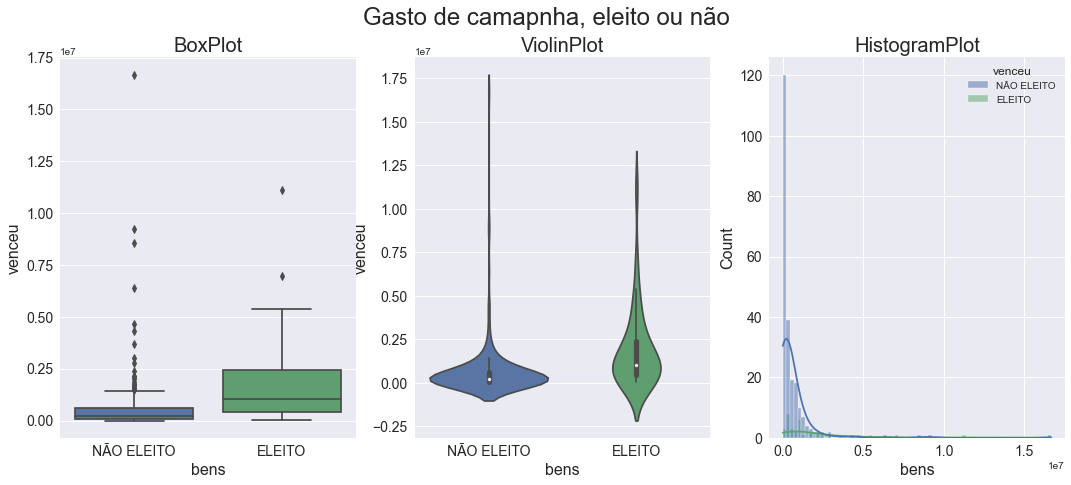

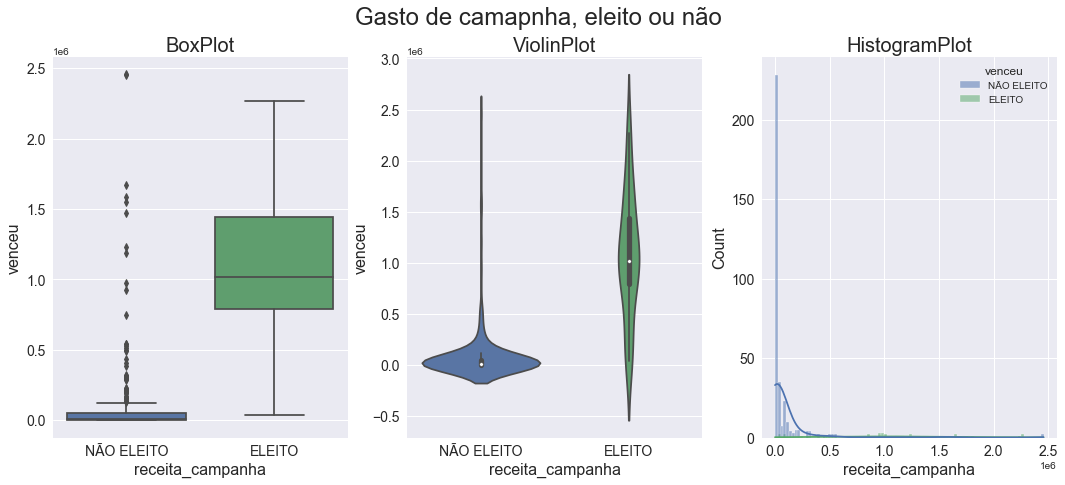

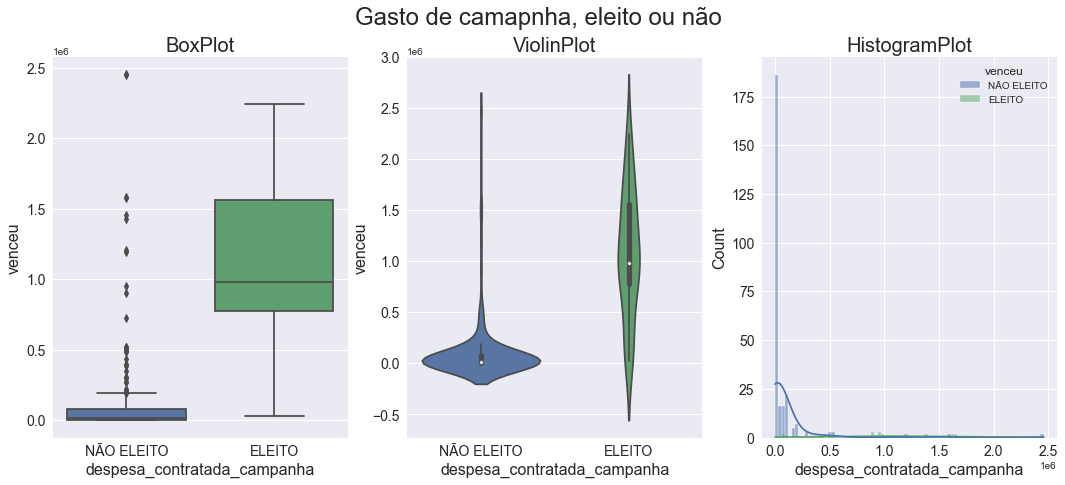

In [99]:
# 'bens', 'receita_campanha', 'despesa_contratada_campanha'

describe_y_classify_numeric_feature(
    df_tse, 'bens', 'venceu', 'Gasto de camapnha, eleito ou não')

describe_y_classify_numeric_feature(
    df_tse, 'receita_campanha', 'venceu', 'Gasto de camapnha, eleito ou não')

describe_y_classify_numeric_feature(
    df_tse, 'despesa_contratada_campanha', 'venceu', 'Gasto de camapnha, eleito ou não')

OUTROS                                                                94
EMPRESÁRIO                                                            45
ADVOGADO                                                              35
DEPUTADO                                                              31
ADMINISTRADOR                                                         19
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                  15
VEREADOR                                                              14
COMERCIANTE                                                           14
PROFESSOR DE ENSINO MÉDIO                                             13
ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS                        10
MÉDICO                                                                 9
PROFESSOR DE ENSINO FUNDAMENTAL                                        8
ENGENHEIRO                                                             8
SERVIDOR PÚBLICO FEDERAL                           

In [104]:
top_ocupations.index.tolist()[:10]

Index(['OUTROS', 'EMPRESÁRIO', 'ADVOGADO', 'DEPUTADO', 'ADMINISTRADOR', 'APOSENTADO (EXCETO SERVIDOR PÚBLICO)', 'VEREADOR', 'COMERCIANTE', 'PROFESSOR DE ENSINO MÉDIO', 'ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS', 'MÉDICO', 'PROFESSOR DE ENSINO FUNDAMENTAL', 'ENGENHEIRO', 'SERVIDOR PÚBLICO FEDERAL', 'PROFESSOR DE ENSINO SUPERIOR', 'AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS', 'SERVIDOR PÚBLICO MUNICIPAL', 'JORNALISTA E REDATOR', 'POLICIAL MILITAR', 'VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS', 'ECONOMISTA', 'SERVIDOR PÚBLICO ESTADUAL', 'DONA DE CASA', 'CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES', 'REPRESENTANTE COMERCIAL', 'CABELEIREIRO E BARBEIRO', 'COBRADOR DE TRANSPORTE COLETIVO', 'POLICIAL CIVIL', 'AGENTE ADMINISTRATIVO', 'AGRICULTOR', 'VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA', 'CONTADOR', 'ANALISTA DE SISTEMAS', 'PEDAGOGO', 'CANTOR E COMPOSITOR', 'ENFERMEIRO', 'ARTESÃO', 'MOTORISTA PARTICULAR', 'PESCADOR', 'PUBLICITÁRIO', 'MANICURE E MAQUILADOR',
  

In [105]:
top_ocupations = df_tse['ocupacao'].value_counts().index.tolist()[:10]

fig = px.histogram(df_tse[ df_tse['ocupacao'].isin(top_ocupations) ],
             x='ocupacao',
             title='Ocupações',
            color='venceu'
           )

fig.update_xaxes(categoryorder='total descending')
fig.show()

In [106]:
df_tse.columns

Index(['id_tse', 'cargo', 'nome_completo', 'numero_candidato', 'nome_urna', 'situacao_candidatura', 'detalhe_situacao_candidatura', 'numero_partido', 'sigla_partido', 'nome_partido', 'municipio_nascimento', 'data_nascimento', 'genero', 'grau_instrucao', 'estado_civil', 'cor_raca', 'ocupacao', 'reeleicao', 'venceu', 'situacao_candidatura_urna', 'bens', 'receita_campanha', 'despesa_contratada_campanha'], dtype='object')

In [107]:
top_ocupations = df_tse['ocupacao'].value_counts().index.tolist()[:10]

fig = px.histogram(df_tse,
             x='sigla_partido',
             title='sigla_partido',
            color='venceu'
           )

fig.update_xaxes(categoryorder='total descending')
fig.show()

In [145]:
def get_percentage_complex(df1, df_origin, col_target):
    """
    Retorna a porcentage de um valor sobre o sum no dataframe original.
    Eh necessario fazer manulamente pois se não tiver todas as combinaçoes de cat feats
    ao fazer da forma automatica da erro. Entao, eh necessario para haver
    AS COMBINAÇÇOES CAT_FEAT CUJA CONTAGEM SEJA ZERO 
    """
    array = []
    df_sum = df_origin[col_target].value_counts().reset_index()
    df_sum.columns = [col_target, 'sum']
    for index, row in df1.iterrows():
        if(row['count'] != 0):
            v = 100 * (row['count'] / df_sum[ df_sum[col_target] == row[col_target]]['sum'].iloc[0])
        else:
            v = 0
        array.append(v)
    return array

def plotly_cat_to_cat(df, catx, cat2, title='', orderby_func=None, order_ascending=None):
    """
    Amabas devem ser cat feats
    orderby_func = muitas vezes a cat_feat eh ordenavel, use essa campos para designar a funcao
    TEM QUE VERIFICAR QUANDO NAO TEM TODAS AS CATEGORIAS, AI DA ERRO
    """
    cols = [catx, cat2]
    # Faz todas as combinações dos valores unicos de cada coluna
    # por conta disos, se hovuer nao houver a ocorrencia de uma dessa combinaçoes
    # a sua contagem de porcentagem tem que ser feita  de forma analogica 
    # na funcao 'get_percentage_complex'
    df_temp = df.groupby(cols).size().to_frame('count').reindex(
        pd.MultiIndex.from_product([df[catx].unique(), df[cat2].unique()]), fill_value = 0)
    df_temp = df_temp.reset_index().dropna()
    df_temp.columns = cols + ['count']

    df_temp['percentage'] = get_percentage_complex(df_temp, df, catx)
    df_temp['total'] = df_temp['percentage']
    df_temp.columns = cols + ['Counts', 'Percentage', 'Total']
    
    if(not order_ascending is None):
        df_temp = df_temp.sort_values('Percentage', ascending=order_ascending)    
    
    fig = px.bar(df_temp, x=catx, y=['Total'], color=cat2,
       category_orders=orderby_func, hover_data=['Counts'],
       text=df_temp['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
       title=title)
    
    fig.show()

In [147]:
plotly_cat_to_cat(df_tse, 'sigla_partido', 'venceu', title='Porcentagem de vitoria por partido', order_ascending=True)

In [195]:
df_tse.columns

Index(['id_tse', 'cargo', 'nome_completo', 'numero_candidato', 'nome_urna', 'situacao_candidatura', 'detalhe_situacao_candidatura', 'numero_partido', 'sigla_partido', 'nome_partido', 'municipio_nascimento', 'data_nascimento', 'genero', 'grau_instrucao', 'estado_civil', 'cor_raca', 'ocupacao', 'reeleicao', 'venceu', 'situacao_candidatura_urna', 'bens', 'receita_campanha', 'despesa_contratada_campanha', 'deputado_number', 'votes'], dtype='object')

In [196]:
plotly_cat_to_cat(df_tse, 'genero', 'venceu', title='Porcentagem de vitoria por genero', order_ascending=True)

In [197]:
plotly_cat_to_cat(df_tse, 'grau_instrucao', 'venceu', title='Porcentagem de vitoria por grau de instruçãao', order_ascending=True)

In [198]:
plotly_cat_to_cat(df_tse, 'estado_civil', 'venceu', title='Porcentagem de vitoria por estado civil', order_ascending=True)

In [199]:
plotly_cat_to_cat(df_tse, 'cor_raca', 'venceu', title='Porcentagem de vitoria por cor/raça', order_ascending=True)

In [200]:
plotly_cat_to_cat(df_tse, 'reeleicao', 'venceu', title='Porcentagem de vitoria para quem tentou ou não reeleição', order_ascending=True)

## Comparar dados numéricos

In [249]:
def remove_outiliers(df, col):
    df = df.dropna(subset=[col])
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.90)
    return  df[(df[col] < q_hi) & (df[col] > q_low)]

In [250]:
def scatter_corr_numeric_feats(df, colx, coly, classify_col, hover_data=[], title=''):
    fig = px.scatter(df, x=colx, y=coly, color=classify_col, hover_data=hover_data,
                     trendline="ols", title= title)
    fig.show()

In [252]:
df_tse['bens/despesa'] = df_tse['bens'] / df_tse['despesa_contratada_campanha']
df_tse['bens/receita'] = df_tse['bens'] / df_tse['receita_campanha']

df_tse['receita/bens'] =  df_tse['receita_campanha'] / df_tse['bens']

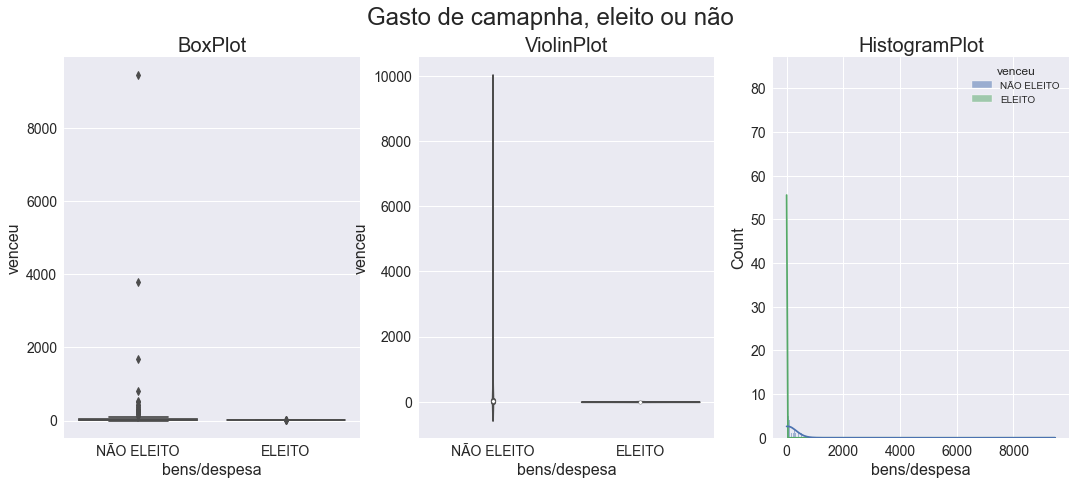

In [253]:
describe_y_classify_numeric_feature(
    remove_outiliers(df_tse, 'bens/despesa'),
    'bens/despesa', 'venceu', 'Gasto de camapnha, eleito ou não')

In [ ]:
scatter_corr_numeric_feats(df_tse, 'receita_campanha', 'bens', 'venceu', title='Bens x Receita',
                           hover_data=['nome_urna', 'sigla_partido', 'bens', 'receita_campanha', 'despesa_contratada_campanha'])

In [260]:
scatter_corr_numeric_feats(df_tse, 'receita/bens', 'votes', 'venceu', title='Bens x Receita',
                           hover_data=['nome_urna', 'sigla_partido', 'bens', 'receita_campanha', 'despesa_contratada_campanha'])

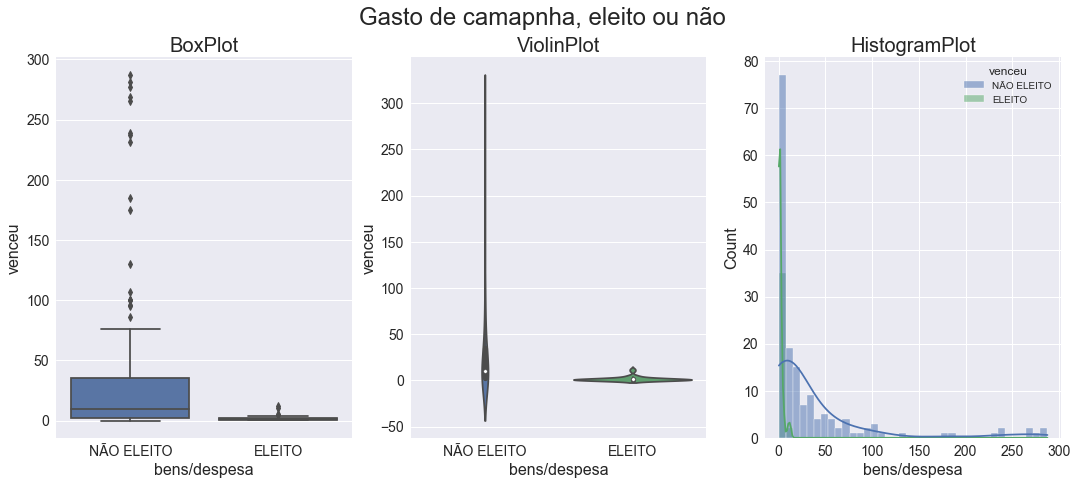

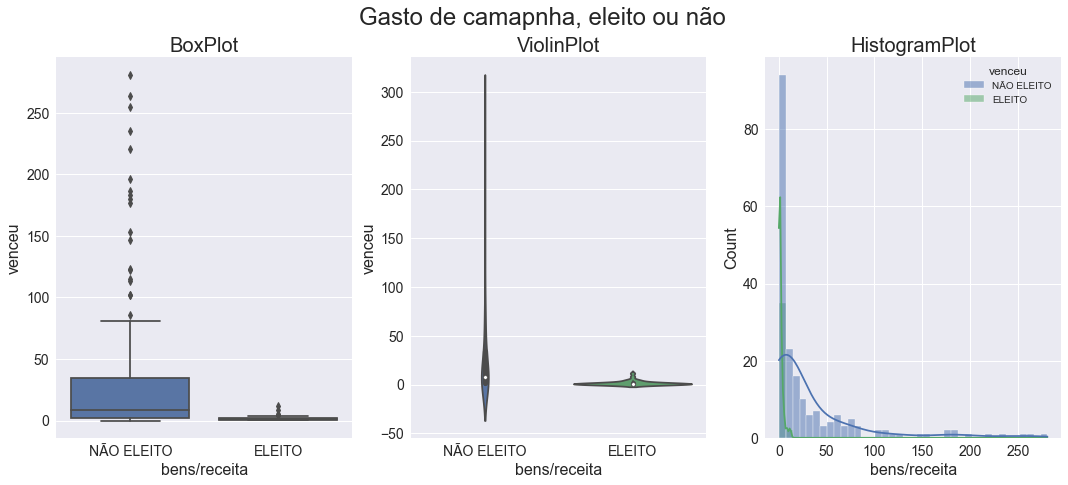

In [245]:
describe_y_classify_numeric_feature(
    remove_outiliers(df_tse, 'bens/despesa'),
    'bens/despesa', 'venceu', 'Gasto de camapnha, eleito ou não')

describe_y_classify_numeric_feature(
    remove_outiliers(df_tse, 'bens/receita'),
    'bens/receita', 'venceu', 'Gasto de camapnha, eleito ou não')

In [251]:
scatter_corr_numeric_feats(df_tse, 'despesa_contratada_campanha', 'receita_campanha', 'venceu', title='despesas x receita',
                           hover_data=['nome_urna', 'sigla_partido', 'bens',
                                       'receita_campanha', 'despesa_contratada_campanha'])

In [247]:
scatter_corr_numeric_feats(remove_outiliers(df_tse, 'bens/receita'), 'votes', 'bens/receita', 'venceu', title='Votos x bens/receita',
                           hover_data=['nome_urna', 'sigla_partido', 'bens', 'receita_campanha', 'despesa_contratada_campanha'])

In [248]:
scatter_corr_numeric_feats(remove_outiliers(df_tse, 'bens/despesa'), 'votes', 'bens/despesa', 'venceu', title='Votos x bens/despesa',
                           hover_data=['nome_urna', 'sigla_partido', 'bens', 'despesa_contratada_campanha'])

In [189]:
scatter_corr_numeric_feats(df_tse, 'votes', 'receita_campanha', 'venceu', title='Votos x Receita',
                           hover_data=['nome_urna', 'sigla_partido'])

In [190]:
scatter_corr_numeric_feats(df_tse, 'votes', 'despesa_contratada_campanha', 'venceu', title='Votos x Despesas',
                           hover_data=['nome_urna', 'sigla_partido'])

In [191]:
scatter_corr_numeric_feats(df_tse, 'votes', 'bens', 'venceu', title='Votos x Bens',
                           hover_data=['nome_urna', 'sigla_partido'])

## Bin Scatter

In [203]:
!pip install binsreg

In [204]:
import binsreg

def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(df_aux[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est

# Plot binned scatterplot
def plot_binscatter(data, colx, coly, title, ci=(3,3)):
    df_est = binscatter(colx, coly, data=data, ci=ci)
    sns.scatterplot(x=colx, y=coly, data=df_est);
    plt.errorbar(colx, coly, yerr='ci', data=df_est, ls='', lw=2, alpha=0.2);
    plt.title(title);
    
# df_aux = df_deputado_info.replace({'Não foi eleito': 0, 'Eleito': 1})
# def plot_binscatter_two_categories(data, colx, coly, col_classify, title,ci=(3,3)):
#     # Estimate binsreg
#     # Tem que substituir por int 
#     df_est = binscatter(x=colx, y=coly, by=col_classify, data=data, ci=ci)

#     # Plot binned scatterplot
#     sns.scatterplot(x=colx, y=coly, data=df_est, hue=col_classify);
#     plt.errorbar(colx, coly, yerr='ci',
#                  data=df_est.query(col_classify + " == 0 "), ls='', lw=2, alpha=0.2);
#     plt.errorbar(colx, coly, yerr='ci',
#                  data=df_est.query(col_classify + " == 1 "), ls='', lw=2, alpha=0.2);
#     plt.title(title);

ModuleNotFoundError: No module named 'matplotlib.backends.backend_pdf'